In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import scipy as sc
from scipy.stats import ttest_ind
from scipy import stats

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

students = pd.read_csv('stud_math.csv')

## 1. Проведите первичную обработку данных.

In [2]:
# Начнем с первичного анализа имеющихся данных
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

У нас есть 394 строки и 30 колонок. В таких столбцах как address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, schoolsup, famsup, paid, activities, nursery, studytime, higher, internet, romantic, famrel,  freetime, goout, health, absences, score есть missing values (незаполненные ячейки)
<br> Большие всего missing values в столбце "Pstatus", то тем не менее, стоблбец заполнен на 88%, то есть его можно оставить.

In [4]:
students_df = students.drop(columns = {"studytime, granular" : "studytime"}) # Нам неизвестна интерпретация данного столбца, поэтому удалим его
students_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


## 2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.

In [5]:
# К количественным столбцам относятся age, Medu, Fedu, traveltime, studytime, failures,famrel, freetime, goout, health, absences, score

In [6]:
list(set(students.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [7]:
students_num = students_df.select_dtypes(include = ['float64', 'int64'])
students_num.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0


In [8]:
display(students_num["age"].describe().round(1))

# видно, что средний возраст равен 16.7 лет, отклонение от среднего достаточно маленькое, Q1 = 16.0, Q3 = 18.0

count    395.0
mean      16.7
std        1.3
min       15.0
25%       16.0
50%       17.0
75%       18.0
max       22.0
Name: age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D53EF74E08>,
      dtype=object)

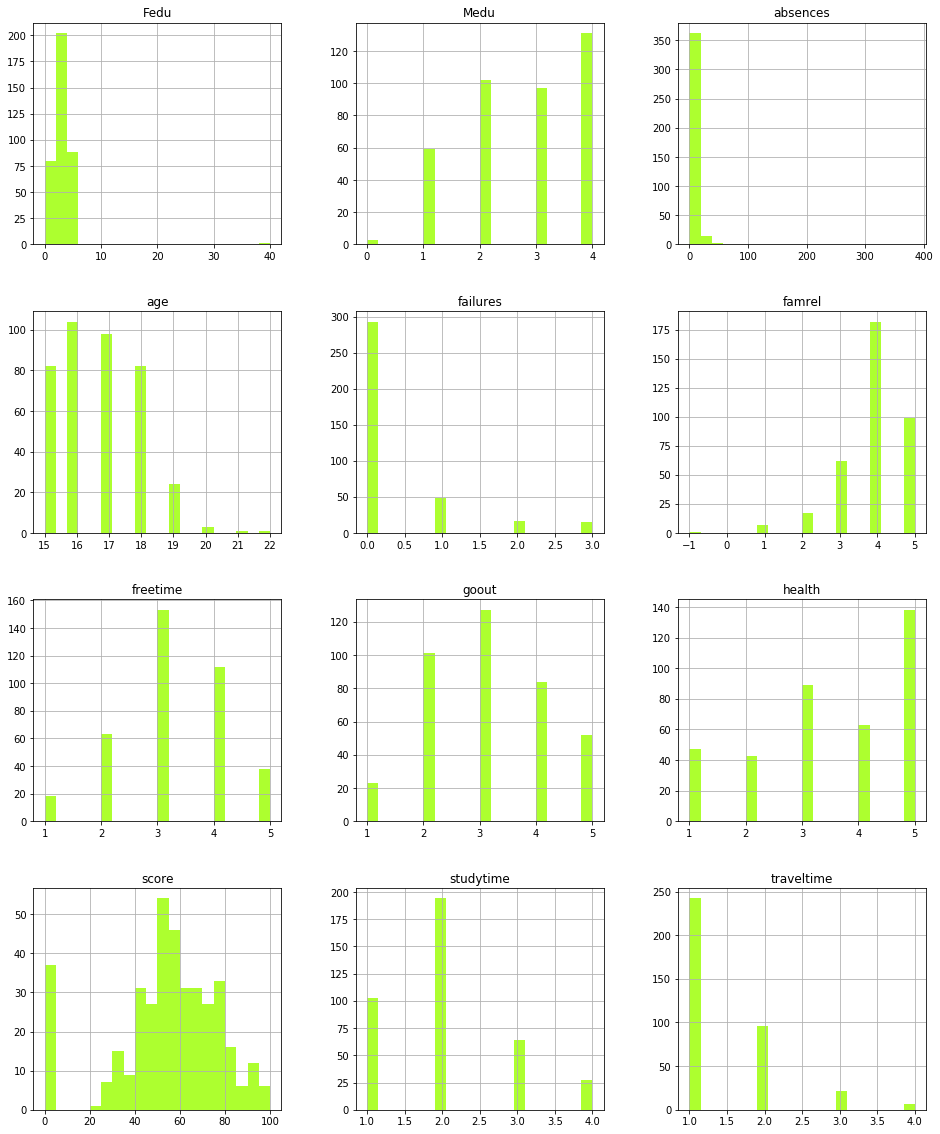

In [9]:
students_num.hist(figsize=(16, 20), bins=20, xlabelsize=10, ylabelsize=10, color = "greenyellow") # Посмотрим на распределение количественных данных

Из гистограмм выше видно, что допущена ошибка при заполнении столбца об образовании отца. Есть значение вне оценочной шкалы, которое представляет собой выброс.
<br> Распределение образования матерей смещено влево. Нет выбросов.
<br> Есть по крайней мере один ученик, который пропустил очень много занятий. Это выброс.
<br> Распределение возраста студентов смещено вправо. Значение 22 является выбросом.
<br> Ученики удачливы вне школы в большиинстве своем.
<br> Есть ошибки при заполнении информации о семейных отношениях. Это значения вне оценочной шкалы, которые становятся выбросами.
<br> Распределение свободного времени нормальное.
<br> Распределение времени, проведенного с друзьями, нормальное.
<br> У большинства учеников очень хорошее состояние здоровья, поэтому распределение смещено влево.
<br> Распредление баллов за экзамен нормальное. 
<br> Большинство учеников тратят 2-5 часов на учебу вне школы.
<br> Большинство учеников живут в пределах менее 15 минут (правда, непонятно, ходьбы или траспортом) до школы.

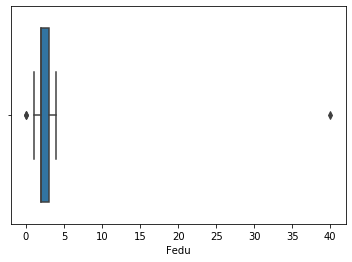

In [10]:
sns.boxplot(students_num["Fedu"]) # есть выбросы. Кто-то допустил ошибку и поставил значение вне оценочной шкалы.

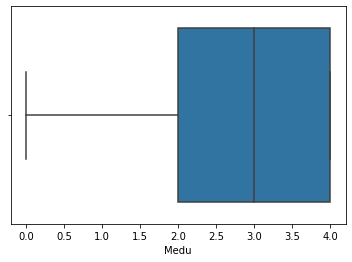

In [11]:
sns.boxplot(students_num["Medu"]) # нет выбросов

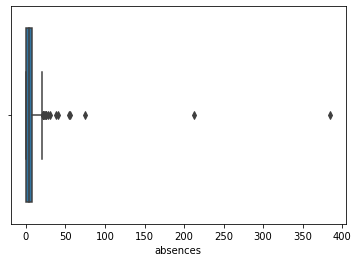

In [12]:
sns.boxplot(students_num["absences"]) # есть выбросы. Несколько студентов пропустили очень много занятий.

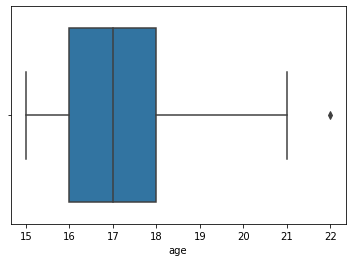

In [13]:
sns.boxplot(students_num["age"]) # выброс равен 22

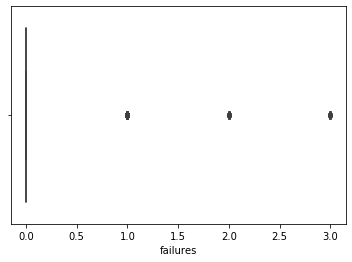

In [14]:
sns.boxplot(students_num["failures"]) # Как уже было видно из графика распределения выше, большинство студентов удачливы и вне школы.
# Неудачливые вне школы студенты составляют меньшинство.

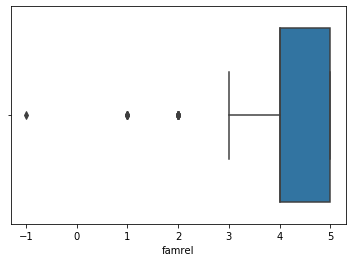

In [15]:
sns.boxplot(students_num["famrel"])

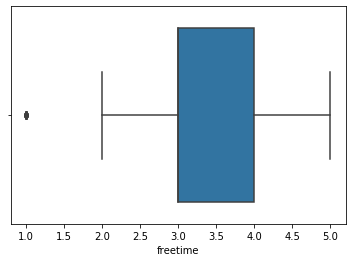

In [16]:
sns.boxplot(students_num["freetime"]) # выброс есть. Как видно и из гистограммы выше, только меньшиству студентов свободного времени мало. Это создает выброс.

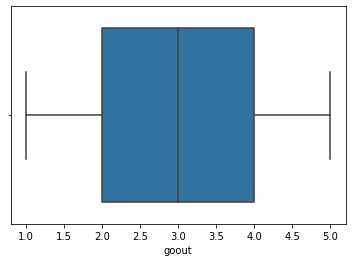

In [17]:
sns.boxplot(students_num["goout"]) # нет выбросов

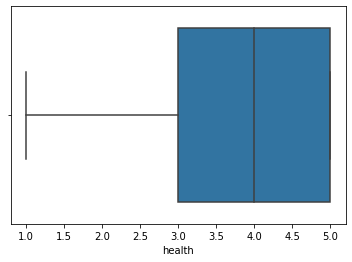

In [18]:
sns.boxplot(students_num["health"]) # нет выбросов

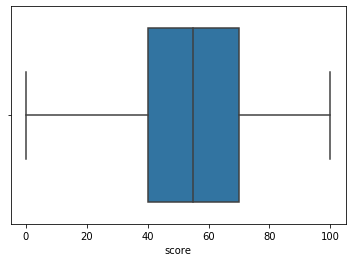

In [64]:
sns.boxplot(students_num["score"]) # нет выбросов

In [19]:
# Удаляем выбросы

students_num.isna().sum() # видим количетсво NaN в каждом столбце

age            0
Medu           3
Fedu          24
traveltime    28
studytime      7
failures      22
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

In [20]:
nonan_students_num = students_num.fillna(0) # Заменяем NaN на нули
nonan_students_num

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2.0,2.0,1.0,2.0,2.0,5.0,5.0,4.0,4.0,212.0,45.0
391,17,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,80.0
392,21,1.0,1.0,1.0,1.0,3.0,5.0,5.0,3.0,3.0,3.0,35.0
393,18,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0


In [21]:
z_scores = stats.zscore(nonan_students_num)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis = 1)
cleaned_students_num = nonan_students_num[filtered_entries]
cleaned_students_num # Мы получаем датафрейм, пригодный для дальнейшего корреляционного анализа, в котором 370 строк

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,5.0,3.0,3.0,3.0,4.0,30.0
3,15,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,4.0,3.0,2.0,5.0,4.0,50.0
5,16,4.0,3.0,1.0,2.0,0.0,5.0,4.0,2.0,5.0,10.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...
388,18,3.0,1.0,1.0,2.0,0.0,4.0,3.0,4.0,1.0,0.0,40.0
389,18,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,5.0,0.0,0.0
391,17,3.0,1.0,2.0,1.0,0.0,2.0,4.0,5.0,2.0,3.0,80.0
393,18,3.0,2.0,3.0,1.0,0.0,4.0,4.0,1.0,5.0,0.0,50.0


## 3. Оцените количество уникальных значений для номинативных переменных.

In [22]:
students_qual = students_df.select_dtypes(include = ["object"])
students_qual.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,NaN,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,NaN,no
1,GP,F,U,GT3,NaN,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,NaN,no,yes,yes,yes,NaN
3,GP,F,U,GT3,T,health,NaN,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


In [23]:
students_qual.nunique() # Следует учесть, что "nan" будет засчитано как уникальное значение, и за счет этого код дает искаженную информацию.

# Рассмотрим каждый столбец на предмет того, какие именно уникальные значения он содержит, ниже.

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [24]:
students_qual["school"].unique() # нет nan

array(['GP', 'MS'], dtype=object)

In [25]:
students_qual["sex"].unique() # нет nan

array(['F', 'M'], dtype=object)

In [26]:
students_qual["address"].unique() # есть nan

array(['U', nan, 'R'], dtype=object)

In [27]:
students_qual["famsize"].unique() # есть nan

array([nan, 'GT3', 'LE3'], dtype=object)

In [28]:
students_qual["Pstatus"].unique() # есть nan

array(['A', nan, 'T'], dtype=object)

In [29]:
students_qual["Mjob"].unique() # есть nan

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

In [30]:
students_qual["Fjob"].unique() # есть nan

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

In [31]:
students_qual["reason"].unique() # есть nan

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

In [32]:
students_qual["guardian"].unique() # есть nan

array(['mother', 'father', 'other', nan], dtype=object)

In [33]:
students_qual["schoolsup"].unique() # есть nan

array(['yes', 'no', nan], dtype=object)

In [34]:
students_qual["famsup"].unique() # есть nan

array(['no', 'yes', nan], dtype=object)

In [35]:
students_qual["paid"].unique() # есть nan

array(['no', nan, 'yes'], dtype=object)

In [36]:
students_qual["activities"].unique() # есть nan

array(['no', 'yes', nan], dtype=object)

In [37]:
students_qual["nursery"].unique() # есть nan

array(['yes', 'no', nan], dtype=object)

In [38]:
students_qual["higher"].unique() # есть nan

array(['yes', nan, 'no'], dtype=object)

In [39]:
students_qual["internet"].unique() # есть nan

array([nan, 'yes', 'no'], dtype=object)

In [40]:
students_qual["romantic"].unique() # есть nan

array(['no', nan, 'yes'], dtype=object)

In [41]:
# Итак, только два столбца категориальных признаков из 17 заполнены полностью. В остальных есть missing values, которую нуждаются в обработке.

## 4. По необходимости преобразуйте данные.

In [42]:
clean_students_qual = students_qual.dropna() # Удалив missing values, мы в разы сократили количество наблюдений в выборке, однако повысили качетсво данных
clean_students_qual

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no
10,GP,F,U,GT3,T,teacher,health,reputation,mother,no,yes,yes,no,yes,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,MS,M,R,GT3,T,other,other,other,mother,no,no,no,yes,no,yes,yes,yes
386,MS,F,R,GT3,T,teacher,at_home,reputation,mother,no,yes,yes,yes,yes,yes,yes,yes
387,MS,F,R,GT3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no
388,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,yes,no,yes,yes,yes,no


## 5. Проведите корреляционный анализ количественных переменных.

In [60]:
cleaned_students_num.corr() # Таблица показывает, как между собой коррелируют признаки

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.133127,-0.084857,0.132000,0.024478,0.207846,-0.003545,-0.043424,0.104164,-0.057457,0.158619,-0.179179
Medu,-0.133127,1.000000,0.475646,-0.091138,0.057565,-0.153671,0.010566,0.045640,0.115879,0.021792,0.095665,0.231580
Fedu,-0.084857,0.475646,1.000000,-0.018153,-0.051389,-0.148585,0.047969,0.027261,0.056407,0.050350,0.014388,0.091284
traveltime,0.132000,-0.091138,-0.018153,1.000000,-0.096600,0.029094,-0.007851,-0.057852,0.071638,-0.073796,0.035479,-0.049825
studytime,0.024478,0.057565,-0.051389,-0.096600,1.000000,-0.104446,0.038767,-0.074101,-0.042725,-0.058300,-0.050745,0.050036
failures,0.207846,-0.153671,-0.148585,0.029094,-0.104446,1.000000,-0.066808,0.026072,0.029364,0.113606,0.108471,-0.308214
famrel,-0.003545,0.010566,0.047969,-0.007851,0.038767,-0.066808,1.000000,0.078875,0.021766,-0.051517,-0.079534,0.040777
freetime,-0.043424,0.045640,0.027261,-0.057852,-0.074101,0.026072,0.078875,1.000000,0.264585,0.007041,-0.141022,0.034250
goout,0.104164,0.115879,0.056407,0.071638,-0.042725,0.029364,0.021766,0.264585,1.000000,-0.005427,0.033108,-0.073668
health,-0.057457,0.021792,0.050350,-0.073796,-0.058300,0.113606,-0.051517,0.007041,-0.005427,1.000000,0.003833,-0.038444


In [61]:
# Выявим те признаки, которые сильно коррелируют с баллом на экзамене по математике
# Примем критическое значение коэффициента корреляции равным 0.06, p = 0.05

clean_students_num_corr = cleaned_students_num.corr()['score'][:-1]
strong_corr_list = clean_students_num_corr[abs(clean_students_num_corr) > 0.06].sort_values(ascending=False)
print("Переменных, которые сильно коррелируют с баллом на экзамене:\n{}".format(len(strong_corr_list)))
print(strong_corr_list)

Переменных, которые сильно коррелируют с баллом на экзамене:
5
Medu        0.231580
Fedu        0.091284
goout      -0.073668
age        -0.179179
failures   -0.308214
Name: score, dtype: float64


## 6. Отберите не коррелирующие признаки

In [62]:
noncorr_list = clean_students_num_corr[abs(clean_students_num_corr) < 0.06] # это все переменные, для которых коэффициент ниже принятого критического значения
noncorr_list

traveltime   -0.049825
studytime     0.050036
famrel        0.040777
freetime      0.034250
health       -0.038444
absences      0.024226
Name: score, dtype: float64

In [45]:
# Оставим в датафрейме только коррелирующие признаки

correlated_studets_quan = cleaned_students_num[["Medu", "Fedu", "goout", "age", "failures"]].copy()
correlated_studets_quan # этот датафрейм содержит те количественные параметры, которые мы будем использовать в модели, предсказывающей балл по математике

,Medu,Fedu,goout,age,failures
0,4.0,4.0,4.0,18,0.0
1,1.0,1.0,3.0,17,0.0
3,4.0,2.0,2.0,15,0.0
4,3.0,3.0,2.0,16,0.0
5,4.0,3.0,2.0,16,0.0
...,...,...,...,...,...
388,3.0,1.0,4.0,18,0.0
389,1.0,1.0,1.0,18,1.0
391,3.0,1.0,5.0,17,0.0
393,3.0,2.0,1.0,18,0.0


## 7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину "score"

In [46]:
clean_students_qual # для наглядности выводим очищенную выборку с качественными признаками

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no
10,GP,F,U,GT3,T,teacher,health,reputation,mother,no,yes,yes,no,yes,yes,yes,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,MS,M,R,GT3,T,other,other,other,mother,no,no,no,yes,no,yes,yes,yes
386,MS,F,R,GT3,T,teacher,at_home,reputation,mother,no,yes,yes,yes,yes,yes,yes,yes
387,MS,F,R,GT3,T,services,other,course,mother,no,no,no,yes,no,yes,yes,no
388,MS,F,U,LE3,T,teacher,services,course,mother,no,yes,yes,no,yes,yes,yes,no


In [47]:
# Нулевая гипотеза для каждого из признаков выше предполагает, что параметр на балл на экзамене не влияет.

In [54]:
nonan_students = students.dropna()

In [55]:
def get_stat_dif(column):
    cols = nonan_students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(nonan_students.loc[nonan_students.loc[:, column] == comb[0], 'score'], 
                        nonan_students.loc[nonan_students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [56]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки famsize


## 8. Сформулируйте выводы относительно качества данных и переменных, которые будут использованы в модели.

### Вывод о качестве данных

Качество количественных данных выше качества номинативных данных. После очистки выборки с количественными признаками от выбросов и замены NaN на нули, в данных остается 370 наблюдений. Если примем за генеральную совокупность всех учеников в обеих школах, то есть 394, то у нас остается 93% процента исходных данных. Такую выборку можно считать репрезентативной. Что касается категориальных признаков, то после удаления NaN у нас осталось 134 наблюдения, то есть всего 34% исходных данных - я бы с опаской отнеслась к обобщению резульатов на всю генеральную совокупность.

### Вывод о переменных для построения модели

EDA показал, что для построения модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы, необходимо включить такие параметры как образование матери, образование отца, проведение времени с друзьями, возраст ученика, количество внеучебных неудач, пол, тип адреса ученика (проживает ли в городе или за городом) и размер семьи.